In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv('heart_data.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Preprocessing and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.shape

(319795, 18)

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
total_nulls = df.isnull().sum().sum()
total_nulls

0

In [7]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

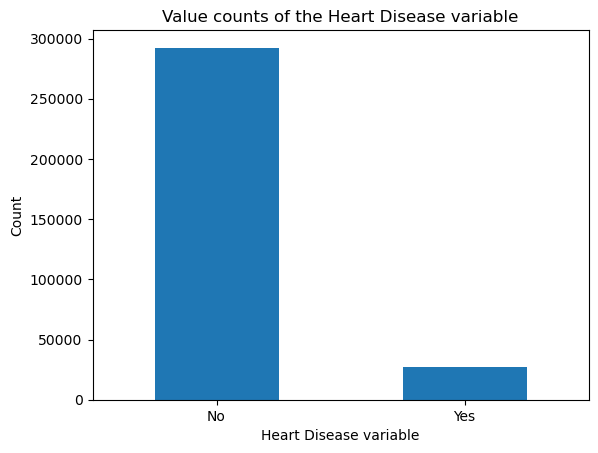

In [8]:
df.HeartDisease.value_counts().plot(kind="bar")
plt.title("Value counts of the Heart Disease variable")
plt.xlabel("Heart Disease variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [9]:
df.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

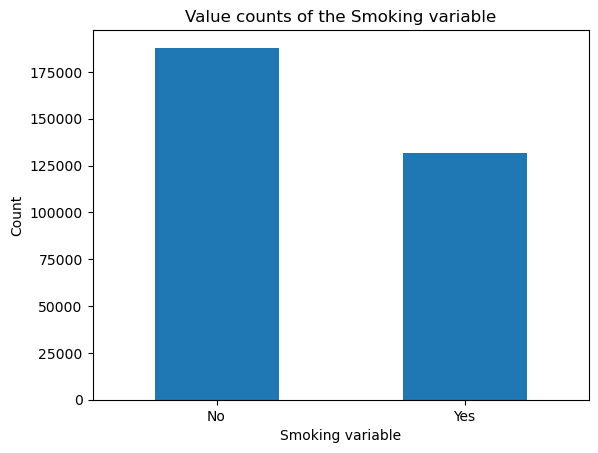

In [10]:
df.Smoking.value_counts().plot(kind="bar")
plt.title("Value counts of the Smoking variable")
plt.xlabel("Smoking variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [11]:
df.AlcoholDrinking.value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

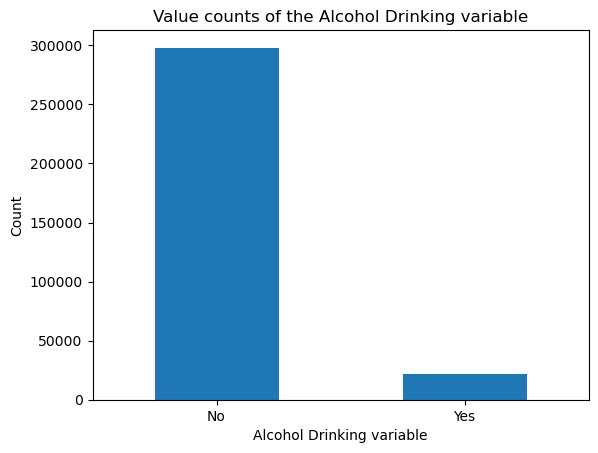

In [12]:
df.AlcoholDrinking.value_counts().plot(kind="bar")
plt.title("Value counts of the Alcohol Drinking variable")
plt.xlabel("Alcohol Drinking variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [13]:
df.Stroke.value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

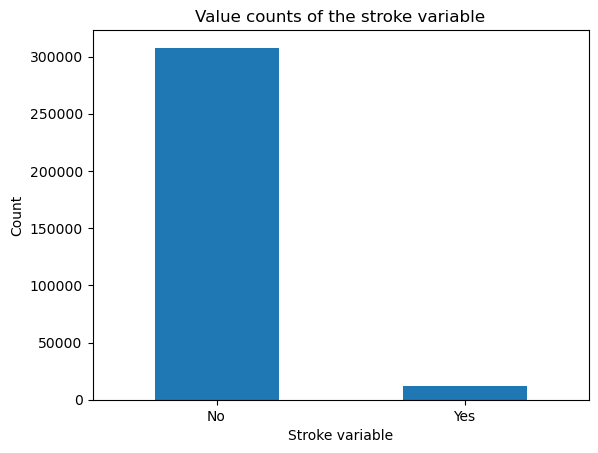

In [14]:
df.Stroke.value_counts().plot(kind="bar")
plt.title("Value counts of the stroke variable")
plt.xlabel("Stroke variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [15]:
df.DiffWalking.value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

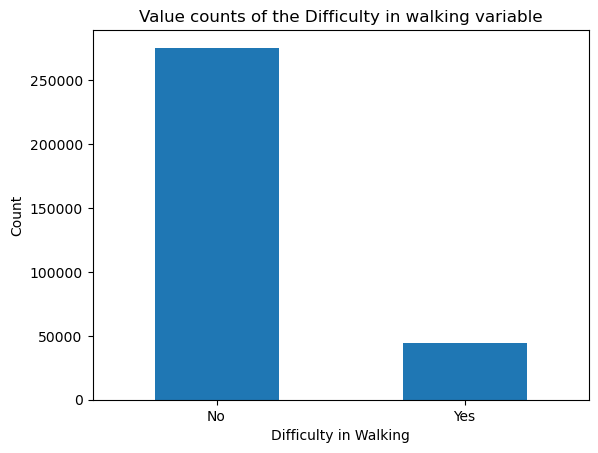

In [16]:
df.DiffWalking.value_counts().plot(kind="bar")
plt.title("Value counts of the Difficulty in walking variable")
plt.xlabel("Difficulty in Walking")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [17]:
df.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

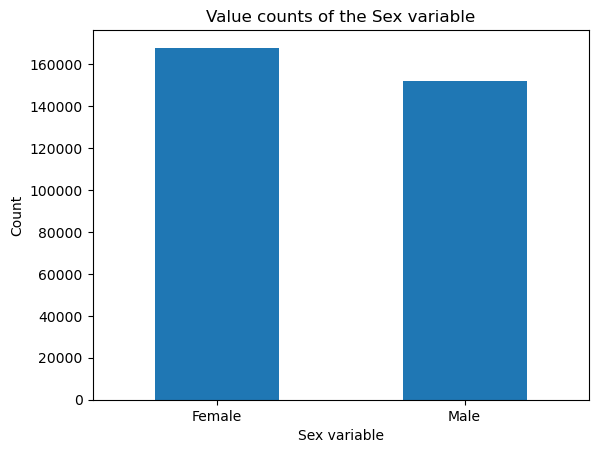

In [18]:
df.Sex.value_counts().plot(kind="bar")
plt.title("Value counts of the Sex variable")
plt.xlabel("Sex variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [19]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

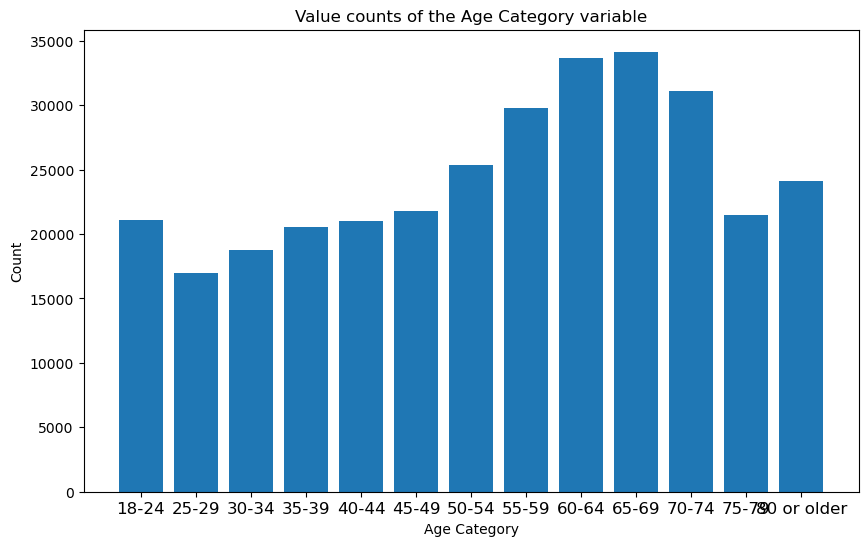

In [20]:
sorted_data = df.groupby('AgeCategory').size().reset_index(name='Count').sort_values(by = 'AgeCategory')
plt.figure(figsize = (10, 6))
fig = plt.bar(sorted_data['AgeCategory'], sorted_data['Count'])
#df.AgeCategory.value_counts().plot(kind="bar")
plt.title("Value counts of the Age Category variable")
plt.xlabel("Age Category", fontsize = 10)
plt.xticks(rotation=0, fontsize = 12)
plt.ylabel("Count")
plt.show()

In [21]:
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

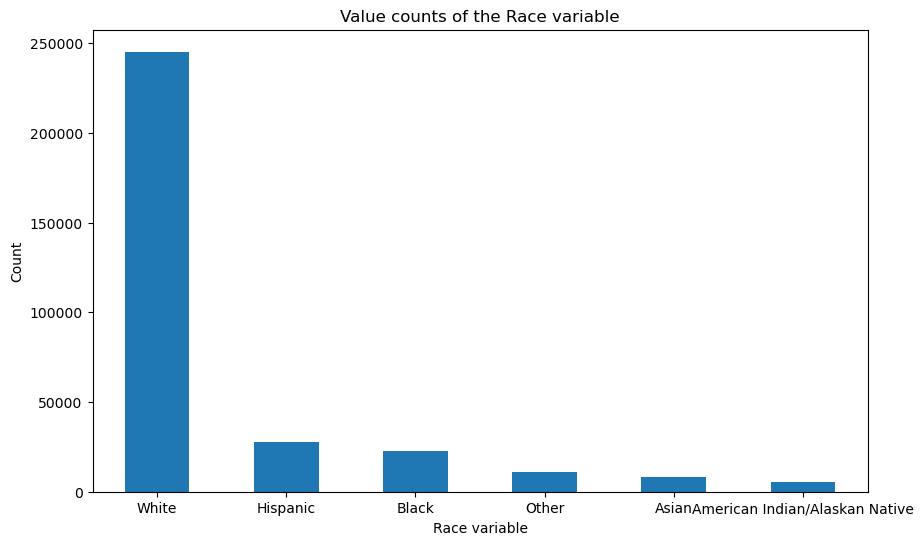

In [22]:
plt.figure(figsize = (10, 6))
df.Race.value_counts().plot(kind="bar")
plt.title("Value counts of the Race variable")
plt.xlabel("Race variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [23]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

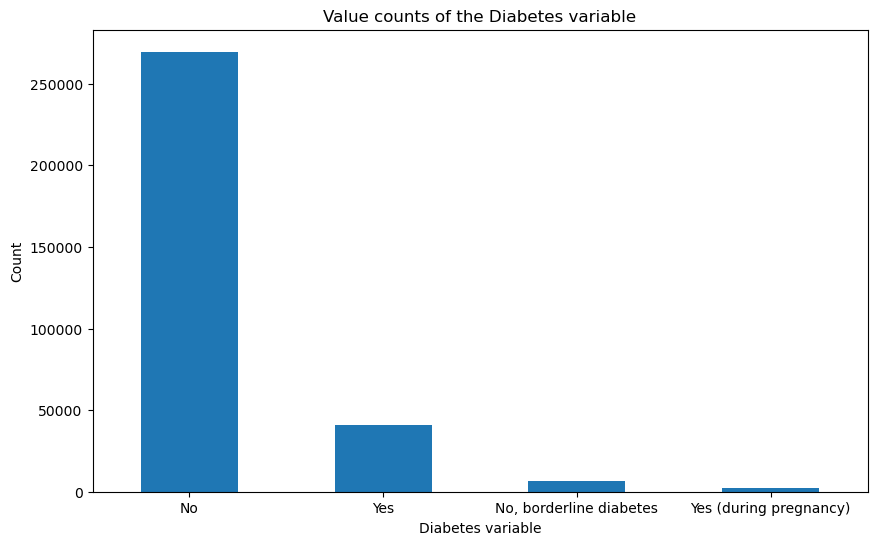

In [24]:
plt.figure(figsize = (10, 6))
df.Diabetic.value_counts().plot(kind="bar")
plt.title("Value counts of the Diabetes variable")
plt.xlabel("Diabetes variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [25]:
df.PhysicalActivity.value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

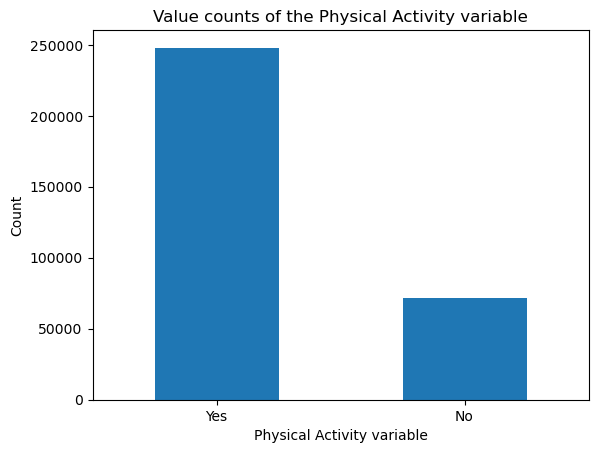

In [26]:
df.PhysicalActivity.value_counts().plot(kind="bar")
plt.title("Value counts of the Physical Activity variable")
plt.xlabel("Physical Activity variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [27]:
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

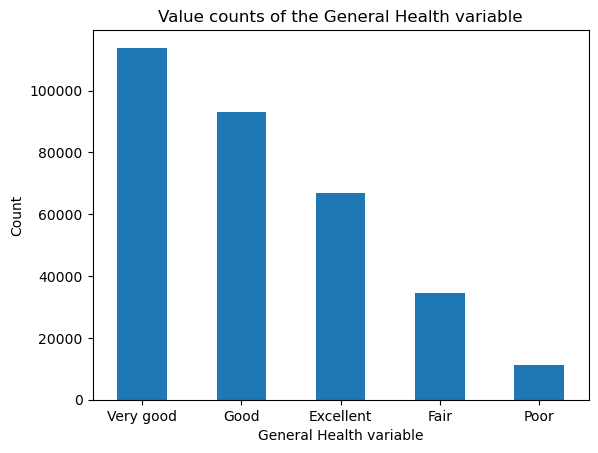

In [28]:
df.GenHealth.value_counts().plot(kind="bar")
plt.title("Value counts of the General Health variable")
plt.xlabel("General Health variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [29]:
df.Asthma.value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

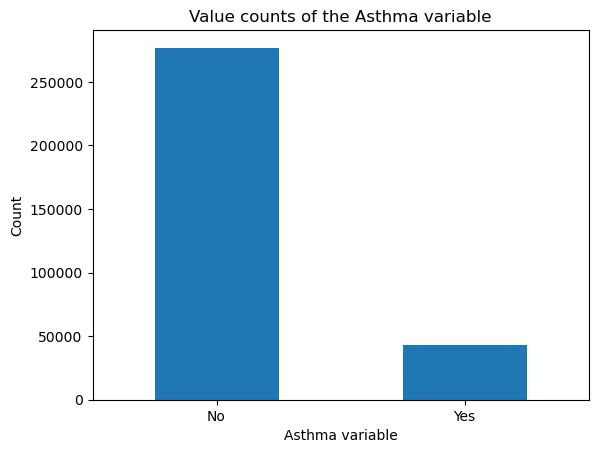

In [30]:
df.Asthma.value_counts().plot(kind="bar")
plt.title("Value counts of the Asthma variable")
plt.xlabel("Asthma variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [31]:
df.KidneyDisease.value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

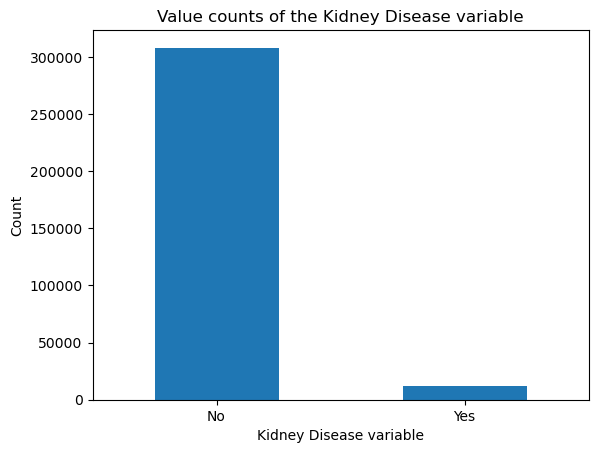

In [32]:
df.KidneyDisease.value_counts().plot(kind="bar")
plt.title("Value counts of the Kidney Disease variable")
plt.xlabel("Kidney Disease variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [33]:
df.SkinCancer.value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

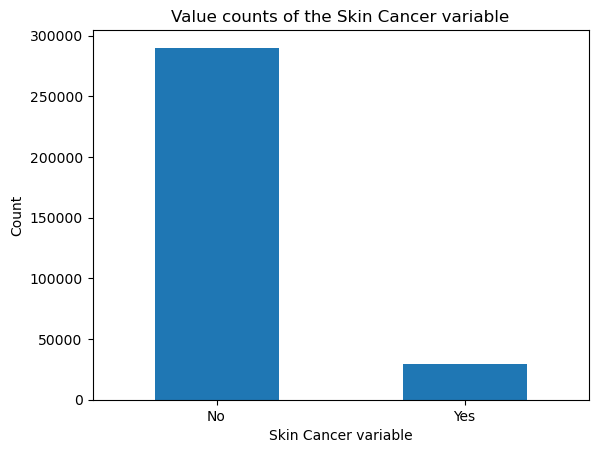

In [34]:
df.SkinCancer.value_counts().plot(kind="bar")
plt.title("Value counts of the Skin Cancer variable")
plt.xlabel("Skin Cancer variable")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [35]:
df.BMI.describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

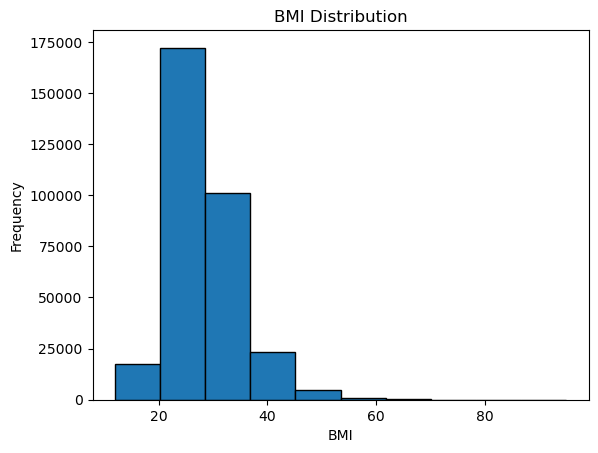

In [36]:
plt.hist(df['BMI'], edgecolor = 'k')

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.grid(False)
plt.show()

In [37]:
df.MentalHealth.describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

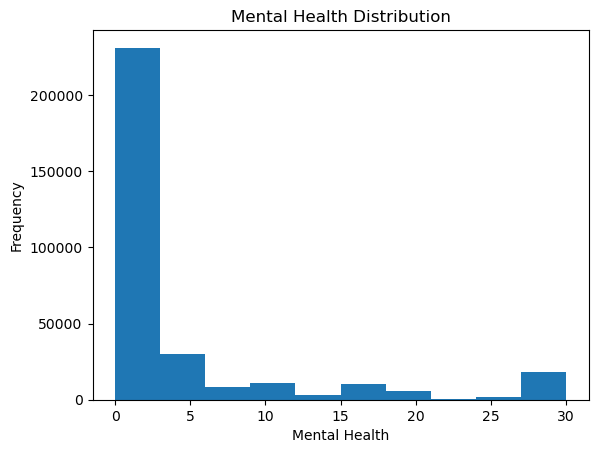

In [38]:
plt.hist(df['MentalHealth'])

plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.title('Mental Health Distribution')
plt.grid(False)
plt.show()

In [39]:
df.SleepTime.describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

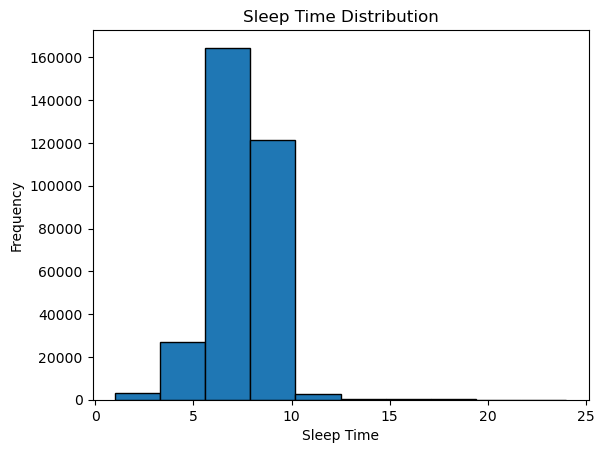

In [40]:
plt.hist(df['SleepTime'], edgecolor = 'k')

plt.xlabel('Sleep Time')
plt.ylabel('Frequency')
plt.title('Sleep Time Distribution')
plt.grid(False)
plt.show()

In [41]:
df.PhysicalHealth.describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

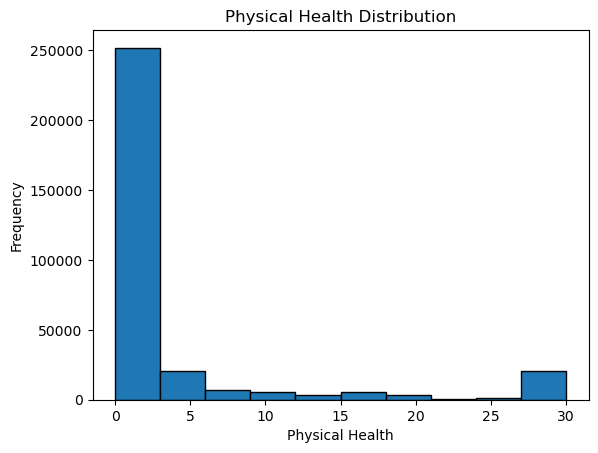

In [42]:
plt.hist(df['PhysicalHealth'], edgecolor = 'k')

plt.xlabel('Physical Health')
plt.ylabel('Frequency')
plt.title('Physical Health Distribution')
plt.grid(False)
plt.show()

In [43]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [44]:
numerical_cols = [col for col in df.columns if
               (df[col].dtype == 'float64') and col != 'HeartDisease']

In [45]:
numerical_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [46]:
df[numerical_cols].describe().loc[['min', 'max', 'mean', '50%'], :]

,BMI,PhysicalHealth,MentalHealth,SleepTime
min,12.020000,0.00000,0.000000,1.000000
max,94.850000,30.00000,30.000000,24.000000
mean,28.325399,3.37171,3.898366,7.097075
50%,27.340000,0.00000,0.000000,7.000000


In [47]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [51]:
df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [53]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [54]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [56]:
df['HeartDisease'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['Smoking'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['AlcoholDrinking'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['Stroke'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['DiffWalking'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['SkinCancer'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['KidneyDisease'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['Asthma'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['PhysicalActivity'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['Sex'].replace(['Male', 'Female'], [1, 0], inplace = True)
df['GenHealth'].replace(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], [1, 2, 3, 4, 5], inplace = True)
df['Diabetic'].replace(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'], [1, 2, 3, 4], inplace = True)
df['Race'].replace(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'White', 'Other'], [1, 2, 3, 4, 5, 6], inplace = True)
df['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

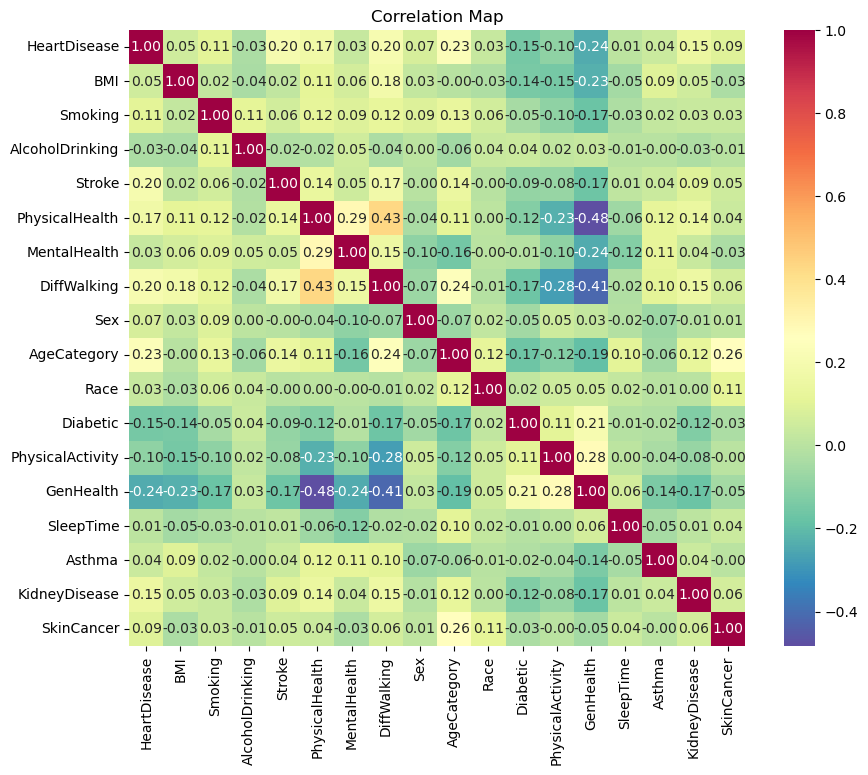

In [57]:
corr_matrix = df.corr()

plt.figure(figsize = (10, 8))
map = sns.heatmap(corr_matrix,
                  cbar = True,
                  annot = True,
                  square = True,
                  fmt = '.2f',
                  annot_kws = {'size': 10},
                  yticklabels = df.columns,
                  xticklabels = df.columns,
                  cmap = "Spectral_r")
plt.title("Correlation Map")
plt.show

In [78]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [175]:
df.to_csv('final_output.csv', index = False)